In [1]:
import collections
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
DATA_DIR = Path('/home/jovyan/jigsaw-toxic/data')
DATASET_DIR = DATA_DIR / 'datasets/mhs'
JIGSAW_TOXIC_SEVERITY_RATING_DIR = DATA_DIR / 'jigsaw-toxic-severity-rating'

In [4]:
comments_to_score_df = pd.read_csv(JIGSAW_TOXIC_SEVERITY_RATING_DIR / 'comments_to_score.csv')

In [5]:
comments_to_score_df

,comment_id,text
0,114890,"""\n \n\nGjalexei, you asked about whether ther..."
1,732895,"Looks like be have an abuser , can you please ..."
2,1139051,I confess to having complete (and apparently b...
3,1434512,"""\n\nFreud's ideas are certainly much discusse..."
4,2084821,It is not just you. This is a laundry list of ...
...,...,...
7532,504235362,"Go away, you annoying vandal."
7533,504235566,This user is a vandal.
7534,504308177,""" \n\nSorry to sound like a pain, but one by f..."
7535,504570375,Well it's pretty fucking irrelevant now I'm un...


In [4]:
!cp $JIGSAW_TOXIC_SEVERITY_RATING_DIR/valid.csv $DATASET_DIR/valid.csv

In [3]:
valid_df = pd.read_csv(DATASET_DIR / 'valid.csv')
valid_df

,less_toxic,more_toxic,certainty
0,"I think people say its not so absurd, because ...",Re Vandalism. . . . that is because the user ...,0.666667
1,You must have the lowest IQ of anyone on wikip...,Wha's a reliable source mike? Something that c...,1.000000
2,"Thanks for removing more of his anonymous, un...","To Bad\nyou dont have the balls to sign in, I ...",1.000000
3,"""\n\nActually, it clearly does not involve pow...",", 18 November 2006 (UTC)\n\nWell comrade. Look...",0.666667
4,You are not cool \n\nYou are the most hated f...,"""== Hey Fuck-head==\nHey, just wanted to say ""...",1.000000
...,...,...,...
10103,Heeeeeeeeeeeeeeyyyyyyyyyyyy dude! Sup!,you deleted my page \nand i am extrememly mad ...,1.000000
10104,ATTENTION:''''''\n\nANYONE WHO OPPOSES MY OPIN...,suck dick u disrespectful swearing wank!!,1.000000
10105,"Oh yah, and Bayerischermann is another guy try...",Thanks. Also thanks for freezing the article. ...,1.000000
10106,I had to chop out a section specifically compa...,"""\n\nHorrifyingly enough, """"ritualistic penis ...",0.666667


In [3]:
orig_df = pd.read_parquet(DATASET_DIR / 'orig.parquet')

In [4]:
orig_df

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,47777,10873,3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,39773,2790,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,47101,3379,3,4.0,4.0,4.0,4.0,4.0,4.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,43625,7365,3,2.0,3.0,2.0,1.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,12538,488,0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135551,37080,8590,2,1.0,1.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
135552,22986,8303,2,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,True,True,False,False,False
135553,21008,6207,2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
135554,22986,7886,2,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False


In [15]:
list(orig_df.columns)

['comment_id',
 'annotator_id',
 'platform',
 'sentiment',
 'respect',
 'insult',
 'humiliate',
 'status',
 'dehumanize',
 'violence',
 'genocide',
 'attack_defend',
 'hatespeech',
 'hate_speech_score',
 'text',
 'infitms',
 'outfitms',
 'annotator_severity',
 'std_err',
 'annotator_infitms',
 'annotator_outfitms',
 'hypothesis',
 'target_race_asian',
 'target_race_black',
 'target_race_latinx',
 'target_race_middle_eastern',
 'target_race_native_american',
 'target_race_pacific_islander',
 'target_race_white',
 'target_race_other',
 'target_race',
 'target_religion_atheist',
 'target_religion_buddhist',
 'target_religion_christian',
 'target_religion_hindu',
 'target_religion_jewish',
 'target_religion_mormon',
 'target_religion_muslim',
 'target_religion_other',
 'target_religion',
 'target_origin_immigrant',
 'target_origin_migrant_worker',
 'target_origin_specific_country',
 'target_origin_undocumented',
 'target_origin_other',
 'target_origin',
 'target_gender_men',
 'target_gende

In [5]:
orig_df[['hate_speech_score', 'std_err']]

,hate_speech_score,std_err
0,-3.90,0.34
1,-6.52,1.00
2,0.36,0.31
3,0.26,0.29
4,1.54,0.51
...,...,...
135551,-4.88,0.69
135552,-4.40,0.35
135553,-2.49,0.37
135554,-4.40,0.35


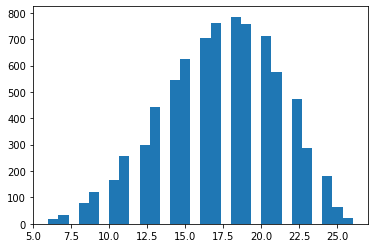

In [6]:
plt.hist([len(orig_df[orig_df['annotator_id'] == aid]) for aid in orig_df['annotator_id'].unique()], bins=30);

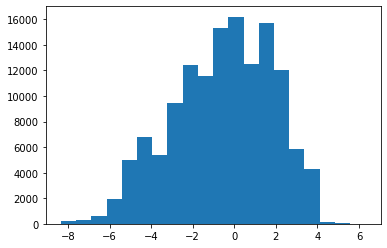

In [7]:
plt.hist(orig_df['hate_speech_score'], bins=20);

In [8]:
orig_df['hate_speech_score'].describe()

count    135556.000000
mean         -0.567428
std           2.380003
min          -8.340000
25%          -2.330000
50%          -0.340000
75%           1.410000
max           6.300000
Name: hate_speech_score, dtype: float64

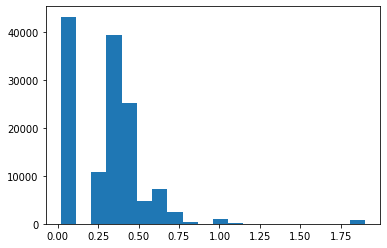

In [10]:
plt.hist(orig_df['std_err'], bins=20);

In [11]:
for cid in tqdm(set(orig_df['comment_id'].unique())):
    assert len(set(orig_df[orig_df['comment_id'] == cid]['hate_speech_score'].unique())) == 1
    assert len(set(orig_df[orig_df['comment_id'] == cid]['std_err'].unique())) == 1

  0%|          | 0/39565 [00:00<?, ?it/s]

In [5]:
def build_hate_speech_score_df(orig_df: pd.DataFrame) -> pd.DataFrame:
    cid_to_hss_tup_dict = {}
    for _, row in tqdm(orig_df.iterrows(), total=len(orig_df)):
        comment_text = str(row['text'])
        if comment_text not in cid_to_hss_tup_dict:
            cid_to_hss_tup_dict[comment_text] = (float(row['hate_speech_score']), float(row['std_err']))
    return pd.DataFrame([
        {'comment_text': comment_text, 'score': score, 'std_err': std_err}
        for comment_text, (score, std_err) in cid_to_hss_tup_dict.items()
    ])

In [6]:
hss_df = build_hate_speech_score_df(orig_df)

  0%|          | 0/135556 [00:00<?, ?it/s]

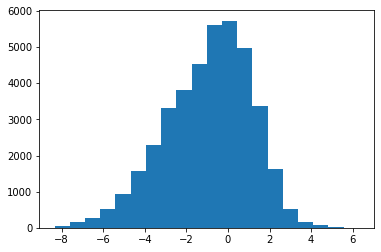

In [27]:
plt.hist(hss_df['score'], bins=20);

In [12]:
hss_df['score_normalized'] = (hss_df['score'] - hss_df['score'].min()) / (hss_df['score'].max() - hss_df['score'].min())

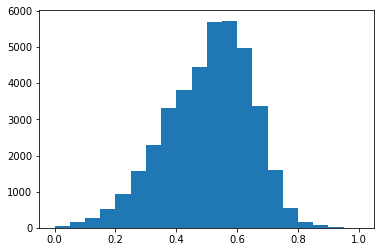

In [28]:
plt.hist(hss_df['score_normalized'], bins=20);

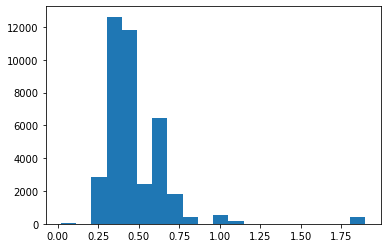

In [7]:
plt.hist(hss_df['std_err'], bins=20);

In [31]:
hss_df.to_csv(DATASET_DIR / 'train_hss.csv', index=False)

In [10]:
hss_df[hss_df['std_err'] <= 0.5]

,comment_text,score,std_err
0,Yes indeed. She sort of reminds me of the elde...,-3.90,0.34
2,Question: These 4 broads who criticize America...,0.36,0.31
3,It is about time for all illegals to go back t...,0.26,0.29
5,Sounds like the kinda wholsesome life I'd die ...,-4.93,0.48
6,Who the fuck is this insignificant simple mind...,0.17,0.30
...,...,...,...
39556,I've always been proud of the Igbo tribe and o...,-5.43,0.04
39557,Millions of #Yemen-is participated in mass ral...,-4.40,0.35
39558,#DSSUpliftsTheThirdGender #EmancipationOfEunuc...,-2.89,0.46
39561,لا تتشمت الرجال مسكين يعاني كس امه 😂. يقول يال...,-0.20,0.41


In [13]:
hss_df[hss_df['std_err'] <= 0.5].to_csv(DATASET_DIR / 'train_hss_stderr_0p5.csv', index=False)

In [3]:
train_hss_df = pd.read_csv(DATASET_DIR / 'train_hss.csv')

In [5]:
train_hss_df

,comment_text,score,std_err,score_normalized
0,Yes indeed. She sort of reminds me of the elde...,-3.90,0.34,0.303279
1,The trans women reading this tweet right now i...,-6.52,1.00,0.124317
2,Question: These 4 broads who criticize America...,0.36,0.31,0.594262
3,It is about time for all illegals to go back t...,0.26,0.29,0.587432
4,For starters bend over the one in pink and kic...,1.54,0.51,0.674863
...,...,...,...,...
39560,🔥PUBG JAPAN SERIES 🔥Grade2 Day2 6/7 <Round8> 1...,-3.10,0.63,0.357923
39561,لا تتشمت الرجال مسكين يعاني كس امه 😂. يقول يال...,-0.20,0.41,0.556011
39562,"Umar khalid, sahela rashid, kanhiyan kumar जैस...",-1.69,0.60,0.454235
39563,@AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...,-2.49,0.37,0.399590
